<a target="_blank" href="https://colab.research.google.com/github/umanitoba-meagher-projects/public-experiments/blob/main/jupyter-notebooks/Visualize%20Image%20Information/100-image-grid.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
"""
Authors: Mitch Constable and Ryleigh J. Bruce
Date: July 10, 2023

Purpose: Taking 100 images of a dataset and converting
 into one image that is a 10x10 grid.


Note: The authors generated this text in part with GPT-4,
OpenAI’s large-scale language-generation model. Upon generating
draft code, the authors reviewed, edited, and revised the code
to their own liking and takes ultimate responsibility for
the content of this code.

"""

## Introduction

This Jupyter Notebook generates a simple image grid of 100 images. Image grids can be used as a structured visual representation of an image dataset that facilitates visual exploration of the data. The images in these examples are ordered by chronological sequence.

## Critical Uses & Adaptability

### What the Notebook Can Be Used For

- Exploring image datasets by creating a visual overview of their contents. By displaying 100, 1000, or 10,000 images in a grid format you can quickly assess the diversity, quality, and consistency of the dataset. This is especially useful for tasks such as identifying outliers, verifying dataset integrity, or gaining an initial understanding of the dataset's characteristics before proceeding with more complex analyses.

### How the Notebook Can Be Adapted

- The notebook includes variables to determine the number of images displayed, the grid dimensions, and the source of the image dataset. These variables can be adjusted to suit specific use cases. For example, the grid size can be modified to display fewer or more images, or the dataset path can be changed to work with a different set of images.

- In the context of spatial design and architectural studies this notebook can be adapted to display site analysis images, architectural renderings, or spatial data visualizations. By organizing these images into a grid, users can compare and contrast different designs, analyze spatial patterns, or present visual data in a structured manner.

## Module: Mount the Notebook to Google Drive and Import Relevant Python Libraries

Here the drive module is imported, allowing the Colab environment to access files within Google Drive. The notebook is then mounted to Google Drive so that it can interact with the files.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In this module, the `pip` package installer is used to install the `Pillow` package, a Python library that is used to easily handle various image formats in Python. This allows the script to interact with image files in later modules.

In [ ]:
!pip install Pillow

The following lines of code import the `os` and `Image` modules. The `Image` module is particularly important as it provides access to the `Image` class, which provides various class functions that allow the script to interact with image files.

In [ ]:
import os
from PIL import Image

## Module: Determining the Grid Size

In this module the script prepares a list of image files to be processed, specifically .png, .jpg, or .jpeg files. The images are resized to be 128 pixels by 128 pixels, and the `grid_size` variable specifies that the desired resulting grid is 10 images by 10 images. The slice code `[:100]` ensures that only the first 100 images within the source folder are used in the final grid output.

In [ ]:
def create_image_grid(folder, output_image_path, image_size=(128, 128), grid_size=(10, 10)):
    # Prepare the directory and get the list of image files
    images = [os.path.join(folder, file) for file in os.listdir(folder) if file.lower().endswith(('.png', '.jpg', '.jpeg'))][:100]

This 'if' statement ensures that the program has exactly 100 images to work with before attempting any further processing. If the program has more or less than the desired 100 images, the code exits the function and prints an error message. This prevents any potential errors that may occur from attempting to generate a 10 by 10 grid with more or fewer images than required.

In [ ]:
    # Ensure we have exactly 100 images, or exit otherwise
    if len(images) != 100:
        print("Error: Exactly 100 images are required.")
        return

## Module: Resizing the Images

Here the the images are each opened using the `Image.open()` function, and resized to the parameters set in an earlier module (128, 128). Using the `Image.LANCZOS` resampling filter from the PIL library ensures that the quality of the images is maintained after the resizing process.

In [ ]:
    # Open images and resize them
    images = [Image.open(image).resize(image_size, Image.LANCZOS) for image in images]

## Module: Creating an Empty Figure

This module creates an empty figure based on the previously determined dimensions. It is in the RGB color mode and provides a space to place the 100 selected images into.

In [ ]:
    # Create a new empty image with appropriate size
    grid_width = image_size[0] * grid_size[0]
    grid_height = image_size[1] * grid_size[1]
    grid_image = Image.new('RGB', (grid_width, grid_height))

## Module: Filling the Grid

The following module of code loops through the gathered index of images while keeping track of its position within the list. The code uses simple division to determine the x and y coordinates of the desired image placement, which ensures that the entire empty figure generated previously is filled.



In [ ]:
    # Paste images into the grid_image
    for index, image in enumerate(images):
        row = index // grid_size[0]  # Integer division to find row index
        col = index % grid_size[0]  # Modulo to find column index
        x = col * image_size[0]
        y = row * image_size[1]
        grid_image.paste(image, (x, y))

## Module: Saving the Final Grid

The code below saves the generated grid image at a given output path that is determined using the `output_image_path` variable that is defined in the following example module.

In [ ]:
    # Save the final image
    grid_image.save(output_image_path)
    print(f"Grid image saved at {output_image_path}")

The `folder_path` should be the file path to the folder containing the image set being used to create the final grid image. The `output_image_path` should be replaced with the file path for the folder that will contain the generated image. It is critical to include the `\grid_image.jpg` suffix in the `output_image_path` value.

In [ ]:
# Example usage:
folder_path = '/content/drive/My Drive/shared-data/Notebook datafiles/100grid-sample-images'  # Update this path
output_image_path = r"C:\Users\rjbru\OneDrive\Desktop\2024_URA\Understanding Animals\COMPLETED JN\New folder\grid_image.jpg"  # Update this path
create_image_grid(folder_path, output_image_path)

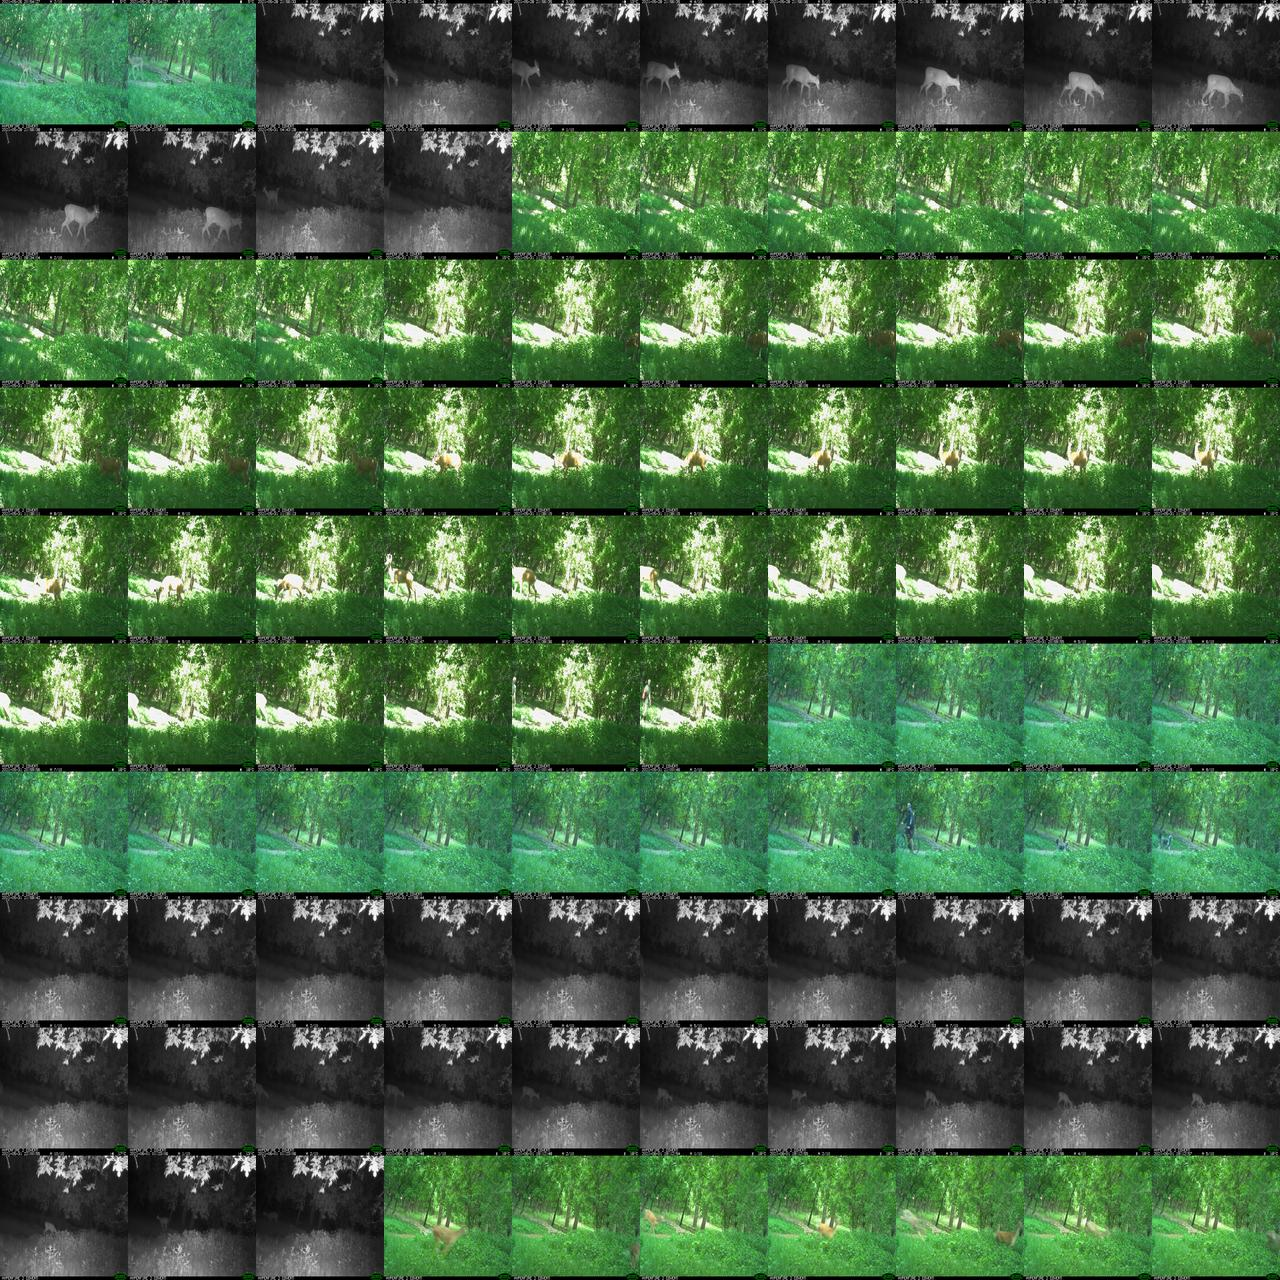


This is what the functioning code looks like in its entirety:

In [ ]:
!pip install Pillow

import os
from PIL import Image
from google.colab import drive

def create_image_grid(folder, output_image_path, image_size=(128, 128), grid_size=(10, 10)):
    # Prepare the directory and get the list of image files
    images = [os.path.join(folder, file) for file in os.listdir(folder) if file.lower().endswith(('.png', '.jpg', '.jpeg'))][:100]

    # Ensure we have exactly 100 images, or exit otherwise
    if len(images) != 100:
        print("Error: Exactly 100 images are required.")
        return

    # Open images and resize them
    images = [Image.open(image).resize(image_size, Image.LANCZOS) for image in images]

    # Create a new empty image with appropriate size
    grid_width = image_size[0] * grid_size[0]
    grid_height = image_size[1] * grid_size[1]
    grid_image = Image.new('RGB', (grid_width, grid_height))

    # Paste images into the grid_image
    for index, image in enumerate(images):
        row = index // grid_size[0]  # Integer division to find row index
        col = index % grid_size[0]  # Modulo to find column index
        x = col * image_size[0]
        y = row * image_size[1]
        grid_image.paste(image, (x, y))

    # Save the final image
    grid_image.save(output_image_path)
    print(f"Grid image saved at {output_image_path}")

# Example usage:
folder_path = '/content/drive/My Drive/shared-data/Notebook datafiles/100grid-sample-images'  # Update this path
output_image_path = r"C:\Users\rjbru\OneDrive\Desktop\2024_URA\Understanding Animals\COMPLETED JN\New folder\grid_image.jpg"  # Update this path
create_image_grid(folder_path, output_image_path)

## Module: Customizing the Grid

Now that there is a functioning base code to generate a gridded image it is relatively simple to customize the result by switching the values of a handful of variables.

In this example, the script will be modified to generate a 5x5 image grid rather than the original 10x10 image. This is done by changing the `grid_size` value from (10, 10) to (5, 5). Now that 25 images are required rather than 100 images to generate the grid, the slice value will need to be changed to 25.

In [ ]:
def create_image_grid(folder, output_image_path, image_size=(128, 128), grid_size=(5, 5)):
    # Prepare the directory and get the list of image files
    images = [os.path.join(folder, file) for file in os.listdir(folder) if file.lower().endswith(('.png', '.jpg', '.jpeg'))][:25]

The value and associated error code found within the if statement will also need to be changed from `100` to `25`. This means that the code will now bail if it has more or less than 25 images, rather than 100.

In [ ]:
    # Ensure we have exactly 25 images, or exit otherwise
    if len(images) != 25:
        print("Error: Exactly 25 images are required.")
        return

The remaining code can be left as is. The values above can be manipulated to generate a variety of grid dimensions.

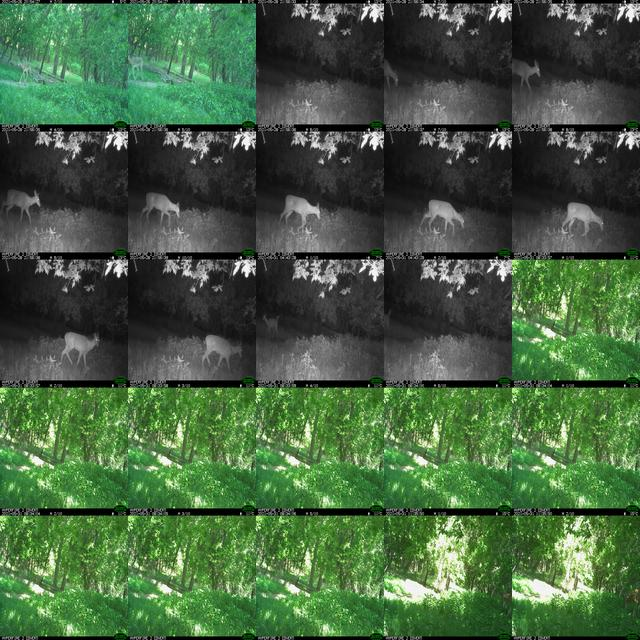